In [73]:
import pandas as pd
import config
import load_wrds_bondret
import load_opensource
import data_processing

OUTPUT_DIR = config.OUTPUT_DIR
DATA_DIR = config.DATA_DIR

# #loading raw data 
# df_bondret = load_wrds_bondret.load_bondret(data_dir = DATA_DIR)
# df_daily = load_opensource.load_daily_bond(data_dir=DATA_DIR)
pd.set_option('display.max_columns', None)


In [74]:
df_bondret = pd.read_parquet(DATA_DIR / "pulled" / "Bondret.parquet")
df_bondret.head()

,cusip,date,issue_id,bond_sym_id,price_eom,price_ldm,price_l5m,bsym,isin,company_symbol,bond_type,rating_cat,tmt,rating_class,t_date,t_volume,t_dvolume,security_level,conv,offering_date,offering_amt,offering_price,principal_amt,maturity,treasury_maturity,coupon,day_count_basis,dated_date,first_interest_date,last_interest_date,ncoups,amount_outstanding,r_sp,r_mr,r_fr,n_sp,n_mr,n_fr,rating_num,year
0,000361AB1,2002-07-31,2.00,AIR.GA,102.79,NaN,NaN,None,US000361AB18,AIR,CDEB,BBB,1.23,0.IG,2002-07-05,2000.00,2055.82,SEN,0.00,1993-10-12,50000.00,100.00,1000.00,2003-10-15,10 YEAR,7.25,30/360,1993-10-15,1994-04-15,2003-04-15,2.00,50000.00,BBB,BAA3,BB+,9.00,10.00,11.00,9.00,2002
1,000361AB1,2002-08-31,2.00,AIR.GA,103.09,103.09,103.09,None,US000361AB18,AIR,CDEB,BBB,1.14,0.IG,2002-08-30,35000.00,35308.90,SEN,0.00,1993-10-12,50000.00,100.00,1000.00,2003-10-15,10 YEAR,7.25,30/360,1993-10-15,1994-04-15,2003-04-15,2.00,50000.00,BBB,BAA3,BB+,9.00,10.00,11.00,9.00,2002
2,000361AB1,2002-09-30,2.00,AIR.GA,103.14,NaN,NaN,None,US000361AB18,AIR,CDEB,BBB,1.06,0.IG,2002-09-06,50000.00,51571.50,SEN,0.00,1993-10-12,50000.00,100.00,1000.00,2003-10-15,10 YEAR,7.25,30/360,1993-10-15,1994-04-15,2003-04-15,2.00,50000.00,BBB,BAA3,BB+,9.00,10.00,11.00,9.00,2002
3,000361AB1,2002-11-30,2.00,AIR.GA,102.75,NaN,NaN,None,US000361AB18,AIR,CDEB,BBB,0.89,0.IG,2002-11-19,1013000.00,849114.05,SEN,0.00,1993-10-12,50000.00,100.00,1000.00,2003-10-15,10 YEAR,7.25,30/360,1993-10-15,1994-04-15,2003-04-15,2.00,50000.00,BBB,BAA3,BB+,9.00,10.00,11.00,9.00,2002
4,000361AB1,2002-12-31,2.00,AIR.GA,101.95,101.95,101.95,None,US000361AB18,AIR,CDEB,BBB,0.80,0.IG,2002-12-31,196000.00,197411.16,SEN,0.00,1993-10-12,50000.00,100.00,1000.00,2003-10-15,10 YEAR,7.25,30/360,1993-10-15,1994-04-15,2003-04-15,2.00,50000.00,BBB,BAA3,BB+,9.00,10.00,11.00,9.00,2002


In [221]:
df_bondret['issuance'] = df_bondret['principal_amt'] * df_bondret['offering_amt'] * df_bondret['offering_price'] / 100 / 1000000
df_bondret.groupby('year')['issuance'].mean()

year
2002   283.93
2003   310.43
2004   344.95
2005   371.25
2006   386.58
2007   404.74
2008   433.92
2009   455.79
2010   452.06
2011   456.50
2012   451.05
2013   453.42
2014   467.14
2015   489.75
2016   518.42
2017   522.30
2018   515.90
2019   503.43
2020   490.65
2021   481.71
2022   476.11
2023   470.07
Name: issuance, dtype: float64

In [75]:
df_daily = pd.read_csv('/Users/adair/Desktop/FinancialTool/Group_Project/BondDailyPublic.csv')
df_daily['trd_exctn_dt'] = pd.to_datetime(df_daily['trd_exctn_dt'])
df_daily['year'] = df_daily['trd_exctn_dt'].dt.year
df_daily['month'] = df_daily['trd_exctn_dt'].dt.month
df_daily.head()

,Unnamed: 0,cusip_id,trd_exctn_dt,prclean,prfull,acclast,accpmt,accall,ytm,ytmt,qvolume,dvolume,coupon,mod_dur,convexity,cs_dur,cs,year,month
0,0,000361AB1,2002-08-13,100.00,102.42,2.42,61.62,64.04,0.07,0.07,25000.00,25000.00,7.25,1.08,1.71,0.06,0.05,2002,8
1,1,000361AB1,2002-08-30,103.09,105.89,2.80,61.62,64.42,0.04,0.04,10000.00,10309.00,7.25,1.04,1.63,0.03,0.03,2002,8
2,2,000361AB1,2002-09-06,103.14,106.06,2.92,61.62,64.55,0.04,0.04,50000.00,51572.00,7.25,1.02,1.59,0.03,0.02,2002,9
3,3,000361AB1,2002-11-08,83.58,84.12,0.54,65.25,65.79,0.29,0.29,1000000.00,835750.00,7.25,0.79,0.98,0.27,0.27,2002,11
4,4,000361AB1,2002-12-02,99.00,99.99,0.99,65.25,66.24,0.08,0.08,15000.00,14850.00,7.25,0.81,1.06,0.07,0.07,2002,12


In [101]:
# check if any row have same value in cusip_id and trd_exctn_dt
df_daily[df_daily.duplicated(subset=['cusip_id', 'trd_exctn_dt'])]

,Unnamed: 0,cusip_id,trd_exctn_dt,prclean,prfull,acclast,accpmt,accall,ytm,ytmt,qvolume,dvolume,coupon,mod_dur,convexity,cs_dur,cs,year,month


In [76]:
df_daily['year'] = df_daily['trd_exctn_dt'].dt.year
df_daily['month'] = df_daily['trd_exctn_dt'].dt.month

In [77]:
#processing data 
df_all = data_processing.all_trace_data_merge(df_daily, df_bondret)   #this is the dataset for panel B in table 1 
df_sample = data_processing.sample_selection(df_all) # this is the dataset for panel A in table 1


In [79]:
df_all.head()



,Unnamed: 0,cusip,trd_exctn_dt,prclean,prfull,acclast,accpmt,accall,ytm,ytmt,qvolume,dvolume,coupon_x,mod_dur,convexity,cs_dur,cs,year_x,month,month_time,date,issue_id,bond_sym_id,price_eom,price_ldm,price_l5m,bsym,isin,company_symbol,bond_type,rating_cat,tmt,rating_class,t_date,t_volume,t_dvolume,security_level,conv,offering_date,offering_amt,offering_price,principal_amt,maturity,treasury_maturity,coupon_y,day_count_basis,dated_date,first_interest_date,last_interest_date,ncoups,amount_outstanding,r_sp,r_mr,r_fr,n_sp,n_mr,n_fr,rating_num,year_y,year
0,23,000361AB1,2003-04-14,98.60,98.62,0.02,68.87,68.90,0.10,0.10,80000.00,78881.00,7.25,0.47,0.45,0.09,0.09,2003,4,2003-04,2003-04-30,2.00,AIR.GA,99.00,NaN,NaN,None,US000361AB18,AIR,CDEB,BB,0.47,1.HY,2003-04-16,808000.00,694028.50,SEN,0.00,1993-10-12,50000.00,100.00,1000.00,2003-10-15,10 YEAR,7.25,30/360,1993-10-15,1994-04-15,2003-04-15,2.00,50000.00,BB-,B1,BB+,13.00,14.00,11.00,13.00,2003.00,2003
1,24,000361AB1,2003-04-15,82.77,82.81,0.04,68.87,68.92,0.51,0.51,714000.00,590975.00,7.25,0.39,0.31,0.50,0.50,2003,4,2003-04,2003-04-30,2.00,AIR.GA,99.00,NaN,NaN,None,US000361AB18,AIR,CDEB,BB,0.47,1.HY,2003-04-16,808000.00,694028.50,SEN,0.00,1993-10-12,50000.00,100.00,1000.00,2003-10-15,10 YEAR,7.25,30/360,1993-10-15,1994-04-15,2003-04-15,2.00,50000.00,BB-,B1,BB+,13.00,14.00,11.00,13.00,2003.00,2003
2,25,000361AB1,2003-04-16,99.00,99.12,0.12,68.87,69.00,0.09,0.09,14000.00,13860.00,7.25,0.46,0.43,0.08,0.08,2003,4,2003-04,2003-04-30,2.00,AIR.GA,99.00,NaN,NaN,None,US000361AB18,AIR,CDEB,BB,0.47,1.HY,2003-04-16,808000.00,694028.50,SEN,0.00,1993-10-12,50000.00,100.00,1000.00,2003-10-15,10 YEAR,7.25,30/360,1993-10-15,1994-04-15,2003-04-15,2.00,50000.00,BB-,B1,BB+,13.00,14.00,11.00,13.00,2003.00,2003
3,26,000361AB1,2003-05-06,87.50,87.96,0.46,68.87,69.34,0.41,0.41,100000.00,87500.00,7.25,0.36,0.28,0.40,0.40,2003,5,2003-05,2003-05-31,2.00,AIR.GA,85.00,NaN,NaN,None,US000361AB18,AIR,CDEB,BB,0.38,1.HY,2003-05-22,342000.00,305580.00,SEN,0.00,1993-10-12,50000.00,100.00,1000.00,2003-10-15,10 YEAR,7.25,30/360,1993-10-15,1994-04-15,2003-04-15,2.00,50000.00,BB-,B1,BB+,13.00,14.00,11.00,13.00,2003.00,2003
4,27,000361AB1,2003-05-07,91.36,91.84,0.48,68.87,69.36,0.30,0.30,110000.00,100495.00,7.25,0.38,0.31,0.29,0.29,2003,5,2003-05,2003-05-31,2.00,AIR.GA,85.00,NaN,NaN,None,US000361AB18,AIR,CDEB,BB,0.38,1.HY,2003-05-22,342000.00,305580.00,SEN,0.00,1993-10-12,50000.00,100.00,1000.00,2003-10-15,10 YEAR,7.25,30/360,1993-10-15,1994-04-15,2003-04-15,2.00,50000.00,BB-,B1,BB+,13.00,14.00,11.00,13.00,2003.00,2003


<Axes: ylabel='Frequency'>

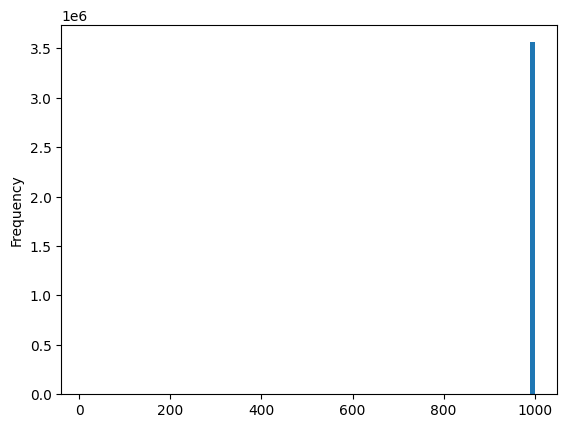

In [217]:
# check the max of offer_price and the min of offer_price
df_all['offering_price'].max(), df_all['offering_price'].min()
# plot the distribution of offering price
df_all['principal_amt'].plot.hist(bins=100)

In [193]:
df_price = df_all.groupby(['year', 'cusip', 'date'])['prclean'].mean().reset_index()
df_price.head()

,year,cusip,date,prclean
0,2003,000336AE7,2003-04-30,90.39
1,2003,000336AE7,2003-05-31,93.92
2,2003,000336AE7,2003-06-30,97.40
3,2003,000336AE7,2003-07-31,99.01
4,2003,000336AE7,2003-08-31,99.19


In [194]:
df_price.groupby(['year'])['prclean'].mean()

year
2003   105.09
2004   105.75
2005   103.87
2006   100.83
2007   100.59
2008    93.29
2009    88.50
Name: prclean, dtype: float64

In [ ]:
print(df_all.shape)
# drop the duplicate value if cusip and date are the same
df_all = df_all.drop_duplicates(subset=['cusip_id', 'trd_exctn_dt'])
print(df_all.shape)

In [ ]:
# Do we need to delete duplicate row in df_all?

In [ ]:
def cal_avrage(dataframe, column):
    average = dataframe.groupby('year')[column].mean()
    return average

def cal_median(dataframe, column):
    median = dataframe.groupby('year')[column].median()
    return median

def cal_std(dataframe, column):
    std = dataframe.groupby('year')[column].std()
    return std

def cal_count(dataframe, column='cusip'):
    # count the unique value of the cusip
    count = dataframe.groupby('year')[column].nunique()
    return count

In [ ]:
#calculate the number of unique cusip in df_all
cal_count(df_all)

year
2003    14176
2004    16299
2005    16848
2006    16691
2007    16898
2008    16666
2009    13974
Name: cusip, dtype: int64

In [ ]:
#calculate the number of unique cusip in df_sample
cal_count(df_sample)

year
2003    781
2004    896
2005    861
2006    723
2007    611
2008    513
2009    426
Name: cusip, dtype: int64

In [216]:
#calculate the average of the issuance in df_sample
#not use scientific notation
pd.options.display.float_format = '{:.2f}'.format
df_sample['issuance'] = df_sample['offering_amt'] * df_sample['principal_amt'] * df_sample['offering_price'] / 100 / 1000000
print(cal_avrage(df_sample, 'issuance'))
print(cal_median(df_sample, 'issuance'))
print(cal_std(df_sample, 'issuance'))

year
2003    992.24
2004    981.89
2005    990.05
2006    983.18
2007   1001.46
2008   1031.99
2009   1070.58
Name: issuance, dtype: float64
year
2003   749.46
2004   749.36
2005   771.83
2006   797.36
2007   797.90
2008   847.97
2009   990.48
Name: issuance, dtype: float64
year
2003   735.05
2004   712.18
2005   696.05
2006   658.99
2007   675.69
2008   705.11
2009   725.92
Name: issuance, dtype: float64


In [218]:
df_all['issuance'] = df_all['offering_amt'] * df_all['principal_amt'] * df_all['offering_price'] / 100 / 1000000
print(cal_avrage(df_all, 'issuance'))
print(cal_median(df_all, 'issuance'))
print(cal_std(df_all, 'issuance'))


year
2003   503.48
2004   539.18
2005   578.81
2006   596.44
2007   632.53
2008   714.01
2009   735.86
Name: issuance, dtype: float64
year
2003   299.76
2004   349.42
2005   399.28
2006   447.03
2007   496.79
2008   499.02
2009   499.07
Name: issuance, dtype: float64
year
2003   549.51
2004   560.12
2005   573.61
2006   573.27
2007   595.74
2008   688.38
2009   743.56
Name: issuance, dtype: float64


In [208]:
df_sample_group = df_sample.groupby(['year', 'cusip'])['issuance'].mean().reset_index()
df_sample_group.groupby(['year'])['issuance'].mean()

year
2003   991.72
2004   992.40
2005   992.21
2006   991.45
2007   990.37
2008   991.18
2009   989.62
Name: issuance, dtype: float64

In [84]:
# calculate the average of the rating in df_all
print(cal_avrage(df_sample, 'n_mr'))
print(cal_median(df_sample, 'n_mr'))
print(cal_std(df_sample, 'n_mr'))

year
2003   5.87
2004   5.67
2005   5.60
2006   5.29
2007   5.21
2008   5.59
2009   6.32
Name: n_mr, dtype: float64
year
2003   6.00
2004   5.00
2005   5.00
2006   5.00
2007   5.00
2008   6.00
2009   6.00
Name: n_mr, dtype: float64
year
2003   2.33
2004   2.35
2005   2.39
2006   2.24
2007   2.30
2008   2.39
2009   2.15
Name: n_mr, dtype: float64


In [ ]:
# calculate Maturity
print(cal_avrage(df_all, 'tmt'))
print(cal_median(df_all, 'tmt'))
print(cal_std(df_all, 'tmt'))

year
2003   8.36
2004   8.01
2005   7.52
2006   7.51
2007   7.83
2008   7.77
2009   7.79
Name: tmt, dtype: float64
year
2003   5.54
2004   5.58
2005   5.45
2006   5.37
2007   5.41
2008   5.11
2009   4.99
Name: tmt, dtype: float64
year
2003   8.53
2004   8.17
2005   7.75
2006   7.91
2007   8.24
2008   8.11
2009   8.18
Name: tmt, dtype: float64


In [86]:
print(cal_avrage(df_sample, 'tmt'))
print(cal_median(df_sample, 'tmt'))
print(cal_std(df_sample, 'tmt'))

year
2003   7.08
2004   6.53
2005   5.88
2006   5.39
2007   5.27
2008   4.93
2009   4.96
Name: tmt, dtype: float64
year
2003   4.99
2004   4.66
2005   4.19
2006   3.81
2007   3.72
2008   3.42
2009   3.22
Name: tmt, dtype: float64
year
2003   6.72
2004   6.55
2005   6.21
2006   5.96
2007   6.06
2008   5.98
2009   6.23
Name: tmt, dtype: float64


In [ ]:
# calculate coupon
print(cal_avrage(df_all, 'coupon_y'))
print(cal_median(df_all, 'coupon_y'))
print(cal_std(df_all, 'coupon_y'))

year
2003   7.02
2004   6.78
2005   6.53
2006   6.42
2007   6.33
2008   6.27
2009   6.21
Name: coupon_y, dtype: float64
year
2003   7.00
2004   6.88
2005   6.62
2006   6.46
2007   6.25
2008   6.15
2009   6.15
Name: coupon_y, dtype: float64
year
2003   1.71
2004   1.87
2005   1.91
2006   1.88
2007   1.86
2008   1.80
2009   1.88
Name: coupon_y, dtype: float64


In [87]:
print(cal_avrage(df_sample, 'coupon_y'))
print(cal_median(df_sample, 'coupon_y'))
print(cal_std(df_sample, 'coupon_y'))

year
2003   6.14
2004   5.85
2005   5.65
2006   5.48
2007   5.48
2008   5.61
2009   5.77
Name: coupon_y, dtype: float64
year
2003   6.35
2004   6.00
2005   5.70
2006   5.50
2007   5.45
2008   5.62
2009   5.70
Name: coupon_y, dtype: float64
year
2003   1.40
2004   1.47
2005   1.45
2006   1.41
2007   1.40
2008   1.37
2009   1.34
Name: coupon_y, dtype: float64


In [ ]:
# Calculate the age where the gap between the issuance date and the trade date in years

# check the data type of the date
df_all['date'] = pd.to_datetime(df_all['date'])
df_all['offering_date'] = pd.to_datetime(df_all['offering_date'])

df_all['age'] = (df_all['date'] - df_all['offering_date']).dt.days / 365
print(cal_avrage(df_all, 'age'))
print(cal_median(df_all, 'age'))
print(cal_std(df_all, 'age'))


year
2003   4.37
2004   4.32
2005   4.42
2006   4.56
2007   4.65
2008   4.68
2009   4.62
Name: age, dtype: float64
year
2003   3.77
2004   3.24
2005   3.42
2006   3.62
2007   3.77
2008   3.80
2009   3.66
Name: age, dtype: float64
year
2003   3.60
2004   3.66
2005   3.69
2006   3.79
2007   3.96
2008   4.07
2009   4.11
Name: age, dtype: float64


In [89]:
df_sample['date'] = pd.to_datetime(df_sample['date'])
df_sample['offering_date'] = pd.to_datetime(df_sample['offering_date'])

df_sample['age'] = (df_sample['date'] - df_sample['offering_date']).dt.days / 365
print(cal_avrage(df_sample, 'age'))
print(cal_median(df_sample, 'age'))
print(cal_std(df_sample, 'age'))

year
2003   2.95
2004   3.25
2005   3.73
2006   4.36
2007   5.19
2008   6.16
2009   6.83
Name: age, dtype: float64
year
2003   2.16
2004   2.56
2005   3.17
2006   3.93
2007   4.66
2008   5.66
2009   6.49
Name: age, dtype: float64
year
2003   2.61
2004   2.64
2005   2.58
2006   2.32
2007   2.34
2008   2.39
2009   2.28
Name: age, dtype: float64


In [225]:
# Calculate the turnover
df_all['turnover'] = df_all['t_volume'] / df_all['issuance'] / 10000
print(cal_avrage(df_all, 'turnover'))
print(cal_median(df_all, 'turnover'))
print(cal_std(df_all, 'turnover'))

year
2003    16.36
2004    15.17
2005    12.75
2006    10.42
2007     9.61
2008   114.50
2009   672.25
Name: turnover, dtype: float64
year
2003   7.13
2004   6.78
2005   5.81
2006   5.69
2007   4.88
2008   4.69
2009   6.47
Name: turnover, dtype: float64
year
2003     106.16
2004      92.74
2005      41.05
2006      18.44
2007      38.88
2008    4967.86
2009   13561.26
Name: turnover, dtype: float64


In [239]:

df_sample['turnover'] = df_sample['t_dvolume'] / df_sample['issuance'] / 1000000 * 100 
print(cal_avrage(df_sample, 'turnover'))
print(cal_median(df_sample, 'turnover'))
print(cal_std(df_sample, 'turnover'))

year
2003   22.85
2004   18.16
2005   13.22
2006    8.22
2007    7.18
2008    7.04
2009    7.69
Name: turnover, dtype: float64
year
2003   12.32
2004   10.15
2005    7.88
2006    6.13
2007    4.99
2008    4.72
2009    5.52
Name: turnover, dtype: float64
year
2003   51.01
2004   39.64
2005   27.01
2006    8.65
2007    7.73
2008    8.33
2009    7.61
Name: turnover, dtype: float64


In [99]:
bond_trade_num = df_sample.groupby(['year', 'month', 'cusip']).size()
bond_trade_num = bond_trade_num.reset_index(name='trade_num')

bond_trade_num.head()


,year,month,cusip,trade_num
0,2003,4,00184AAA3,10
1,2003,4,00184AAB1,11
2,2003,4,00184AAC9,12
3,2003,4,00184AAD7,12
4,2003,4,00184AAE5,12


In [100]:
print(cal_avrage(bond_trade_num, 'trade_num'))
print(cal_median(bond_trade_num, 'trade_num'))
print(cal_std(bond_trade_num, 'trade_num'))

year
2003   18.34
2004   18.84
2005   18.87
2006   18.69
2007   18.12
2008   18.45
2009   18.52
Name: trade_num, dtype: float64
year
2003   20.00
2004   20.00
2005   20.00
2006   19.00
2007   19.00
2008   20.00
2009   19.00
Name: trade_num, dtype: float64
year
2003   3.82
2004   3.01
2005   2.88
2006   3.10
2007   3.39
2008   3.51
2009   3.57
Name: trade_num, dtype: float64


In [103]:
df_sample_month = df_sample.drop_duplicates(subset=['cusip', 'year', 'month'])
print(df_sample_month.shape)
print(df_sample.shape)
df_sample_month.reset_index(inplace=True)

(47825, 63)
(889393, 63)


In [128]:


df_sample_month.head(30)

,level_0,index,Unnamed: 0,cusip,trd_exctn_dt,prclean,prfull,acclast,accpmt,accall,ytm,ytmt,qvolume,dvolume,coupon_x,mod_dur,convexity,cs_dur,cs,year_x,month,month_time,date,issue_id,bond_sym_id,price_eom,price_ldm,price_l5m,bsym,isin,company_symbol,bond_type,rating_cat,tmt,rating_class,t_date,t_volume,t_dvolume,security_level,conv,offering_date,offering_amt,offering_price,principal_amt,maturity,treasury_maturity,coupon_y,day_count_basis,dated_date,first_interest_date,last_interest_date,ncoups,amount_outstanding,r_sp,r_mr,r_fr,n_sp,n_mr,n_fr,rating_num,year_y,year,age,issuance,turnover,return
0,0,5447,11442,001957AP4,2003-04-14,106.40,109.19,2.79,63.77,66.56,0.05,0.05,3911000.00,4161416.00,7.50,2.71,9.27,0.03,0.03,2003,4,2003-04,2003-04-30,94.00,T.GE,108.10,108.10,108.10,None,US001957AP44,T,CDEB,BBB,3.13,0.IG,2003-04-30,33119000.00,35409851.38,SEN,0.00,1994-06-02,500000.00,99.53,1000.00,2006-06-01,12 YEAR,7.50,30/360,1994-06-01,1994-12-01,2005-12-01,2.00,320167.00,BBB+,BAA2,BBB+,8.00,9.00,8.00,8.00,2003.00,2003,8.92,49765.00,6.66,NaN
1,1,5459,11454,001957AP4,2003-05-01,108.76,111.95,3.19,63.77,66.96,0.04,0.04,2206000.00,2399315.00,7.50,2.68,9.07,0.03,0.02,2003,5,2003-05,2003-05-31,94.00,T.GE,110.83,110.83,110.83,None,US001957AP44,T,CDEB,BBB,3.05,0.IG,2003-05-30,24540000.00,26787603.99,SEN,0.00,1994-06-02,500000.00,99.53,1000.00,2006-06-01,12 YEAR,7.50,30/360,1994-06-01,1994-12-01,2005-12-01,2.00,320167.00,BBB+,BAA2,BBB+,8.00,9.00,8.00,8.00,2003.00,2003,9.00,49765.00,4.93,1.26
2,2,5480,11475,001957AP4,2003-06-02,110.60,110.64,0.04,67.52,67.56,0.04,0.04,2229000.00,2465208.00,7.50,2.70,8.98,0.02,0.02,2003,6,2003-06,2003-06-30,94.00,T.GE,110.22,110.22,110.22,None,US001957AP44,T,CDEB,BBB,2.96,0.IG,2003-06-30,18428000.00,20395253.83,SEN,0.00,1994-06-02,500000.00,99.53,1000.00,2006-06-01,12 YEAR,7.50,30/360,1994-06-01,1994-12-01,2005-12-01,2.00,320167.00,BBB+,BAA2,BBB+,8.00,9.00,8.00,8.00,2003.00,2003,9.08,49765.00,3.70,-0.81
3,3,5501,11496,001957AP4,2003-07-01,109.73,110.38,0.65,67.52,68.17,0.04,0.04,305000.00,334688.00,7.50,2.62,8.50,0.02,0.02,2003,7,2003-07,2003-07-31,94.00,T.GE,138.60,138.60,138.60,None,US001957AP44,T,CDEB,BBB,2.88,0.IG,2003-07-31,32406000.00,36210939.52,SEN,0.00,1994-06-02,500000.00,99.53,1000.00,2006-06-01,12 YEAR,7.50,30/360,1994-06-01,1994-12-01,2005-12-01,2.00,320167.00,BBB,BAA2,BBB,9.00,9.00,9.00,9.00,2003.00,2003,9.17,49765.00,6.51,3.29
4,4,5523,11518,001957AP4,2003-08-01,109.76,111.07,1.31,67.52,68.83,0.04,0.04,865000.00,949407.00,7.50,2.53,8.02,0.02,0.02,2003,8,2003-08,2003-08-31,94.00,T.GE,109.54,109.54,109.54,None,US001957AP44,T,CDEB,BBB,2.79,0.IG,2003-08-29,14510000.00,15975793.94,SEN,0.00,1994-06-02,500000.00,99.53,1000.00,2006-06-01,12 YEAR,7.50,30/360,1994-06-01,1994-12-01,2005-12-01,2.00,320167.00,BBB,BAA2,BBB,9.00,9.00,9.00,9.00,2003.00,2003,9.25,49765.00,2.92,NaN
5,5,5543,11538,001957AP4,2003-09-02,110.69,112.61,1.92,67.52,69.44,0.03,0.03,75000.00,83019.00,7.50,2.46,7.63,0.01,0.01,2003,9,2003-09,2003-09-30,94.00,T.GE,110.88,110.88,110.88,None,US001957AP44,T,CDEB,BBB,2.71,0.IG,2003-09-30,3781000.00,4162220.52,SEN,0.00,1994-06-02,500000.00,99.53,1000.00,2006-06-01,12 YEAR,7.50,30/360,1994-06-01,1994-12-01,2005-12-01,2.00,320167.00,BBB,BAA2,BBB,9.00,9.00,9.00,9.00,2003.00,2003,9.33,49765.00,0.76,0.80
6,6,5561,11556,001957AP4,2003-10-01,111.09,113.61,2.52,67.52,70.04,0.03,0.03,2990000.00,3321569.00,7.50,2.38,7.23,0.01,0.01,2003,10,2003-10,2003-10-31,94.00,T.GE,110.16,110.16,110.16,None,US001957AP44,T,CDEB,BBB,2.62,0.IG,2003-10-31,17827000.00,19722341.91,SEN,0.00,1994-06-02,500000.00,99.53,1000.00,2006-06-01,12 YEAR,7.50,30/360,1994-06-01,1994-12-01,2005-12-01,2.00,320167.00,BBB,BAA2,BBB,9.00,9.00,9.00,9.00,2003.00,2003,9.42,49765.00,3.58,-1.04
7,7,5579,11574,001957AP4,2003-11-03,108.49,111.67,3.19,67.52,70.71,0.04,0.04,1836000.00,1991795.00,7.50,2.28,6.70,0.02,0.02,2003,11,2003-11,2003-11-30,94.00,T.GE,109.77,NaN,109.77,None,US001957AP44,T,CDEB,BBB,2.54,0.IG,2003-11-25,9332000.00,10236210.66,SEN,0.00

In [162]:
np.log(-0.01)

/var/folders/2k/13gwwbc55cgb7gvcfsjpdpyr0000gn/T/ipykernel_73477/2909854684.py:1: RuntimeWarning: invalid value encountered in log
  np.log(-0.01)


nan

In [173]:
# calculate the return of cusip
import numpy as np

df_sample_return = np.log(df_sample_month['price_eom'] / df_sample_month.groupby(['cusip'])['price_eom'].shift(1))
pd.set_option('display.max_rows', None)

df_sample_month['return'] = df_sample_return * 100


/var/folders/2k/13gwwbc55cgb7gvcfsjpdpyr0000gn/T/ipykernel_73477/537434182.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample_month['return'] = df_sample_return * 100


In [174]:
df_sample_month['return']

0           NaN
1          2.49
2         -0.55
3         22.91
4        -23.53
5          1.21
6         -0.65
7         -0.36
8         -0.47
9         -0.29
10         0.40
11         0.73
12        -2.45
13         0.14
14        -2.13
15        -3.97
16        -0.62
17         0.13
18        -0.25
19        -0.50
20         0.06
21        -0.11
22        -5.13
23          NaN
24         4.14
25        -0.34
26         0.44
27        -3.77
28         3.14
29         1.07
30        -1.77
31        -0.30
32         1.63
33        -1.20
34         0.38
35        -4.19
36         0.97
37        -2.94
38         2.48
39         0.03
40          NaN
41         1.61
42         0.81
43        -1.76
44        -1.91
45         0.21
46         0.53
47        -0.04
48        -0.54
49         0.38
50         0.20
51        -0.33
52        -1.69
53        -0.68
54        -0.66
55        -0.90
56         0.04
57         0.37
58        -0.13
59        -0.96
60        -0.39
61        -0.44
62      

In [182]:
df_v2 = df_sample_month.groupby(['year', 'cusip'])['return'].mean()
# name the column   
df_v2 = df_v2.reset_index(name='return')

# show thw max and min of the return
df_v2.groupby('year')['return'].mean() + 0.5

year
2003    0.53
2004    0.41
2005    0.16
2006    0.51
2007    0.47
2008   -0.45
2009    1.02
Name: return, dtype: float64

In [183]:
df_v3 = df_sample_month.groupby(['year', 'cusip'])['return'].std()
# name the column
df_v3 = df_v3.reset_index(name='std')

df_v3.groupby('year')['std'].mean()

year
2003   2.29
2004   1.69
2005   1.27
2006   0.85
2007   1.00
2008   4.10
2009   4.15
Name: std, dtype: float64